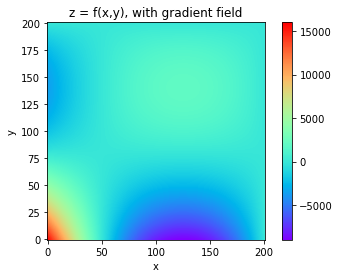

In [1]:
# 用numpy + matplotlib畫任意2D函數圖形

import numpy as np
import pylab as pl
import sympy as sm
import matplotlib.pyplot as plt

def f(x,y): 
    zx = (x-10)*(x+5)
    zy = (y-10)*(y+2)
    z = zx*zy 
    return z 

ϵ = 0.1 
ym, xm = np.mgrid[-10:10+ϵ:ϵ, -10:10+ϵ:ϵ] 
zm = f(xm, ym) 
pl.figure() 
pl.imshow(zm,  
          origin = 'lower',  # 用這行把原點(0,0)設在左下角 
          cmap = 'rainbow'  # 'viridis'
          ) 

pl.xlabel('x')
pl.ylabel('y')
pl.title('z = f(x,y), with gradient field') 

#plt.xticks(np.arange(0, xm[0].size, step=10), xm[0,0::10]) 
#plt.yticks([])#ym[0]) 

# 但是 x,y 軸上的數值標示仍未搞定， 
# 目前是用矩陣的index(0,1,2,...)而非x,y的真實值(-10,…10) 

pl.colorbar() 

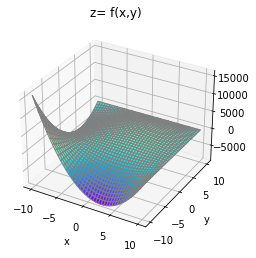

In [2]:
## 試試 3D 

from mpl_toolkits import mplot3d 

fg = pl.figure()

ax = pl.axes(projection = '3d',  
            xlabel = 'x',  
            ylabel = 'y',  
            title = 'z= f(x,y)') 

#ax.contour3D(xm, ym, zm, 100, cmap='rainbow') 

''' 

ax.plot_wireframe(xm, ym, zm, 

                rstride= 5,  

                cstride= 5 

                ) 

''' 

#''' 

ax.plot_surface(xm,ym,zm,  
                rstride = 5,  
                cstride = 5, 
                cmap = 'rainbow',   
                edgecolor = 'gray'
               ) 

#''' 

## 找最高與最低點的座標

In [3]:
# 找最高與最低 

zm.max(), zm.argmax() 
zm.min(), zm.argmin() 
imax, jmax = np.where(zm == zm.max()) 
imin, jmin = np.where(zm == zm.min()) 
imax, jmax, imin, jmin 

(array([0]), array([0]), array([0]), array([125]))

Text([125], [0], 'min')

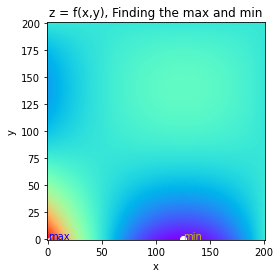

In [4]:
pl.figure()
pl.imshow(zm,  
          origin='lower',  # 用這行把原點(0,0)設在左下角 
          cmap= 'rainbow' #'viridis' 
          ) 

pl.xlabel('x') 
pl.ylabel('y') 
pl.title('z = f(x,y), Finding the max and min') 

# 注意 .plot()與 .imshow()的座標對應 .plot(x,y) ==> .imshow(i,j) 
# x,y = j,i 

xmax, ymax = jmax, imax
xmin, ymin = jmin, imin 

pl.plot(xmax, ymax, 'wx') 
pl.plot(xmin, ymin, 'wo') 
pl.text(xmax, ymax, 'max', color='b') 
pl.text(xmin, ymin, 'min', color='y') 

In [5]:
# 用方程式解

In [6]:
x,y = sm.symbols('x,y')

z = (x-10)*(x+5)*(y-10)*(y+2)
z.expand()

x**2*y**2 - 8*x**2*y - 20*x**2 - 5*x*y**2 + 40*x*y + 100*x - 50*y**2 + 400*y + 1000

In [7]:
dzx = z.diff(x)  # .simplify
dzx

(x - 10)*(y - 10)*(y + 2) + (x + 5)*(y - 10)*(y + 2)

In [8]:
dzy = z.diff(y)  # .simplify
dzy

(x - 10)*(x + 5)*(y - 10) + (x - 10)*(x + 5)*(y + 2)

In [9]:
eq1 = sm.Eq(dzx, 0)
eq2 = sm.Eq(dzy, 0)

eq1

Eq((x - 10)*(y - 10)*(y + 2) + (x + 5)*(y - 10)*(y + 2), 0)

In [10]:
eq2

Eq((x - 10)*(x + 5)*(y - 10) + (x - 10)*(x + 5)*(y + 2), 0)

In [11]:
sol = sm.solve([eq1, eq2], x, y,  
         dict=True,  
         #simplify=True
        ) 
sol

[{x: -5, y: -2},
 {x: -5, y: 10},
 {x: 5/2, y: 4},
 {x: 10, y: -2},
 {x: 10, y: 10}]

In [12]:
len(sol)

5